# Informed Search Agents: Greedy Search, A* Search


## Introduction to Informed Search Agents
We have already seen what uninformed search agents are and how they work. They  can only generate successors and distinguish a goal state from a non-goal state. They have no information about which path is likely the best path towards the solution or whether we are getting close to the goal state. Whereas informed search determine whether one non-goal state is more promising than another and tries to find the best path to the solution (goal state).

Informed search strategy is the one that uses problem specific knowledge beyond the definition of the problem itself. This helps informed search agents to find solutions more efficiently than uninformed search agents.

The general ideas behind informed search techniques are:
*   Apply general search principles.
*   Use available information to select next state to expand.
*   Expand the most promising states first.


The problem-specific information is encoded using evaluation function that describes the desirability of expanding the particular node. Let's look deeper into it.

#### **Evaluation Function**
The evaluation function is a cost estimate evaluated so that node with the lowest cost is expanded first. It is often denoted by the function $f(n)$, where $n$ is a node in path between start node and goal node. It often comprises of cost from start node to current node and estimate of remaining cost from current node to goal node. i.e. $f(n)=g(n) + h(n)$, where $g(n)$ is the cost to reach node $n$ from start node and $h(n)$ is estimate of remaining cost from node $n$ to goal node. The choice of $f$ determines the search strategy.

#### **Heuristic Function**
Many informed search include as a component of $f$ a heuristic function $h(n)$. $h(n)$ is the estimated cost of cheapest path from the state at the node $n$ to a goal state. Unlike $g(n)$, $h(n)$ only depends an the state at node $n$ ($g(n)$ depends on path from start node to node $n$). If $n$ is a goal node then $h(n)$ should be $0$.

Heuristic functions are the most common way of imparting additional knowledge to the problem. For example, in a road map problem, we can use heuristic of straight line distance between a node and destination node. In a 8 puzzle game, we can use number of misplaced tile as heuristic. One important rule about using heuristics is that , heuristic should never overestimate the cost to reach goal state, otherwise optimal solution may not be reached. In our road map example, straight line distance between two cities is always less than or equal to length of road connecting them. This property of heuristic is also called admissibility.

## Greedy Best-First Search
Greedy best-first search always expand the node that appears to be closest to the goal. This helps it to lead to a solution quickly. The cost to reach goal node is estimated using heuristic function (should be admissible); i.e. $f(n) = h(n)$, where $h(n)$ is the estimated cost from node n to the goal. This algorithm is implemented using heap or priority queue.

While using greedy best-first search, we add the start node to the frontier first, the frontier being implemented using priority queue (or heap). The key based on which the nodes are sorted is the value of evaluation function $f(n)$. Each time a node (one with best value of evaluation function) is removed from frontier and added to explored nodes. Then it is checked to be a goal node or not. If it is the goal node, we return the node with success message otherwise we explore their neighbours. If the neighbour is not in frontier or explored nodes, it is added to frontier with evaluation function value. If it is already in frontier, the key value is checked against evaluated function value, and if found to be greater, the key value is updated, so is the priority queue (or heap). This process is repeated until a goal node is found or the frontier becomes empty. If no goal node is found, failure message is returned.

#### **Algorithm**
More formal algorithm for greedy best-first search is given below:

    function greedyBestFirstSearch(initialState, goalTest) /* Cost f(n) = h(n) */
        frontier = Heap.new(initialState)
        explored = Set.new()

        while not frontier.isEmpty():
            state = frontier.deleteMin()
            explored.add(state)

            if goalTest(state):
                return SUCCESS(state)
            for neighbour in state.neighbours():
                if neighbour not in (frontier U explored):
                    frontier.insert(neighbour)
                else if neighbour in frontier:
                    frontier.decreaseKey(neighbour)
        return FAILURE





#### **Example**
A simple example of greedy best-first search using search tree is given below.

**Problem Description**

In the following directed graph, edges between nodes can only be traversed in the direction indicated by the arrow. We will search the graph using greedy best-first search algorithm. If an arbitrary choice has to be made, we need to visit nodes in lexicographical order. **A** is the starting node and **E**, the goal node. The table on the right provides the value of the heuristic function for each node.


![Graph_example_problem_description](https://docs.google.com/drawings/d/e/2PACX-1vRVHy6Ao4Ins7IjGTG4Ypn_RU4LL5BFj1TQJYuJWmFfW0bP9haizHpfTFgGfZvobWhSmhpW093X5BPU/pub?w=618&h=460)

Solution to above problem implementing greedy best-first search is as follows:

![solution_using_GBFS](https://docs.google.com/drawings/d/e/2PACX-1vRoQxAhW_X_A5OGiVYWuIegYLACEKzJTpzJfaQh1QhIjnAmjnsuZ4-jtfYOqC2Oi1cJSFmC9siY5EGt/pub?w=735&h=228)

We first add A to the frontier and explored nodes is empty (see i). We denote explored nodes by orange color and nodes at frontier by gray. Since A is not the goal node, we further expand to get children of A (B, H and I) and add them to frontier (see ii) along with their heuristic value. Then we select the node with least heuristic value (I) and check if it is a goal node. Further we expand to get children of I (which is E) along with its heuristic value and add it to frontier (see iii). Now we select the node from frontier with least heuristic value (that is E). Finally we see the E is goal node and return it with success message (see iv).

## A* Search
A* search is another example of informed search. Unlike greedy best-first search, it evaluates nodes by combining cost to reach the node and cost estimate to get from the node to goal node; i.e. $f(n) = g(n) + h(n) = $ estimated cost of cheapest solution through $n$, where  $g(n)$ is the cost of getting to node n from start node and $h(n)$ is the estimated cost from node n to the goal. Provided that $h(n)$ is admissible, A* search gives the best solution. A* search always manages to reach the goal through the least costly path. This algorithm is also implemented using heap or priority queue.

#### **Algorithm**
A* algorithm is very much similar to greedy best-first search with the only difference that the cost function is the total sum of path cost from start node to node $n$ and estimated cost of cheapest path from $n$ to the goal in A* search. A formal algorithm of A* search is given below:

    function greedyBestFirstSearch(initialState, goalTest) /* Cost f(n) = g(n) + h(n) */
        frontier = Heap.new(initialState)
        explored = Set.new()

        while not frontier.isEmpty():
            state = frontier.deleteMin()
            explored.add(state)

            if goalTest(state):
                return SUCCESS(state)
            for neighbour in state.neighbours():
                if neighbour not in (frontier U explored):
                    frontier.insert(neighbour)
                else if neighbour in frontier:
                    frontier.decreaseKey(neighbour)
        return FAILURE

#### **Example**
Now we solve the problem given in previous section using A* search as follows:

![Solution_using_A*](https://docs.google.com/drawings/d/e/2PACX-1vRVH5KjyEC8463_kK77pdoqpF2pVlcTubNPTsTeu4hkAIMYaZIFWqn1qREqOIgEximVkyq9YEjYw1Kt/pub?w=1188&h=787)

We first add A to the frontier and explored nodes is empty (see i) and denote explored nodes by orange color and nodes at frontier by gray just like before. Since A is not the goal node, we further expand to get children of A (B, H and I) and add them to frontier (see ii) along with their cost estimate of solution ($g(n) + h(n)$). Then we select the node with least cost estimate (H) and check if it is a goal node. Further we expand to get children of H (which is G) along with its cost estimate and add it to frontier (see iii). Again, we select the node with least cost estimate among the ones in frontier (G) and check if it is a goal node. We expand to get children of G (F, I and J) along with its cost estimate and add it to frontier. We see that Fhad previously been added to frontier and select the one with least cost estimate (see iii). Similarly, we select B, C, J, F and E. Finally we see the E is goal node and return it with success message (see ix).

Observe that when using greedy best-first search we found the solution in fewer number of steps. But when using A* search we found the solution through least cost path even if it took higher number of steps to find the solution.

## Comparison between Greedy Best-First Search and A* Search
Both greedy-best first search and A* search fall into the category of "best-first search" algorithms. Each of these algorithm defines an evaluation function for each node n in the graph denoted by $f(n)$.

In the case of greedy best-first search, evaluation function is $f(n)=h(n)$. It expands the node whose estimated cost to the goal node is the least and does not use past knowledge (such as cost to reach the node from start node. Greedy best-first algorithm is not complete because a chosen path may not always reach the goal. It keeps all nodes in memory and hence the space complexity is $O(b^m)$. It is also not optimal because the path found may not be the optimal one. The time complexity is exponential ($O(b^m)$ where b is the maximum branching factor and m is the maximum depth of the search tree).

![comparison](https://docs.google.com/drawings/d/e/2PACX-1vSEy5kHepPgjT6HZVicaW3TrsiwjSJYY3B9G9fw0RVBAaE2zcpsgTGHrMt73EvrnWAAz7mHc4QfaBZ0/pub?w=819&h=287)

In the case of the A* algorithm, the evaluation function is $f(n)=g(n)+h(n)$, where $h$ is an admissible heuristic function making A* search optimal. A* is also complete if the search space is finite (if there is finite number of nodes to explore). The time complexity is $O(b^m)$. It needs to keep all nodes in memory while searching, including both explored nodes and nodes in fringe. Hence, its space complexity also becomes $O(b^m)$. This makes A* search impractical to use when search space is large. But it guarantees completeness and optimality. So, the selection of proper algorithm depends on the context whether we need best result or easier implementation.

Students are suggested to explore other examples of informed search on their own.


## Implementation of Informed Search.
#### Problem Description

Here a network of roadlines has been given for a region. Each node represents a city, each edge repreents road between the cities along with length of road associated as weight. The heuristic values (straight line distances from each city to city Y) is given in the table. Our goal is to reach city Y starting from city P using greedy best-first search and A* search. We have given pictorial representation of solution of this problem using both these algorithms. The complete solution is given in python.

![Problem_Description_Map](https://docs.google.com/drawings/d/e/2PACX-1vTVCFyKbvyX1idHIl1AUO8Us5JJOX243yNsc8VLFlgCMWUyju4Jo0Xe6dQpX4Vl0L5LCs2HYuKFQQYG/pub?w=701&h=335)

#### Greedy Best-First Search

Using greedy best-first search, the steps involved are represented by diagram below. Here priority queue (heap) is used to store frontier and set to store explored nodes.

![map_solution_gbfs](https://docs.google.com/drawings/d/e/2PACX-1vRJ3uPywNUB_cYL7Coi8jfOGn6GzApit5xZS0AVF56OgeYmNPo_82Bm4Mc3eDggRQDWCcgv4GpeWeT-/pub?w=898&h=674)


#### A* Search

Solution when A* search is used is given below:

![map_solution_A*](https://docs.google.com/drawings/d/e/2PACX-1vTm_4NhvJXF_X0hZbH_LQC0OMJUFcRnzYFbtr2Vwp_XJ9Smk7aBB-VRztXmqdP_Wgcdi-pzQ1dqYOmX/pub?w=913&h=987)

#### **Implementation using Python**
Now we have given implementation of the problem using python. We have used networkx library for creation and manipulation of given graph. The graph `G` is first constructed by adding edges and weight to each edge. Heuristic values for each node is stored as given in above table. Also, the cost of reaching each node from start node is set as a very high value (here 2000) that any node cannot take.

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

#Construction of the network
G.add_edge('A', 'B', weight=3)
G.add_edge('A', 'C', weight=1)
G.add_edge('A', 'I', weight=3)
G.add_edge('B', 'C', weight=6)
G.add_edge('B', 'D', weight=3)
G.add_edge('C', 'D', weight=2)
G.add_edge('C', 'F', weight=4)
G.add_edge('C', 'H', weight=5)
G.add_edge('C', 'I', weight=4)
G.add_edge('I', 'H', weight=3)
G.add_edge('D', 'F', weight=6)
G.add_edge('D', 'E', weight=3)
G.add_edge('E', 'G', weight=3)
G.add_edge('E', 'F', weight=1)
G.add_edge('F', 'G', weight=2)
G.add_edge('F', 'H', weight=5)
G.add_edge('H', 'G', weight=3)

#add heuristic values for each node
G.nodes['A']['h'] = 5
G.nodes['B']['h'] = 3
G.nodes['C']['h'] = 4
G.nodes['D']['h'] = 2
G.nodes['E']['h'] = 1
G.nodes['F']['h'] = 3
G.nodes['G']['h'] = 0
G.nodes['H']['h'] = 3
G.nodes['I']['h'] = 4

#initialize cost to reach each node g(n) to a very high value
G.nodes['A']['g'] = 20000
G.nodes['B']['g'] = 20000
G.nodes['C']['g'] = 20000
G.nodes['D']['g'] = 20000
G.nodes['E']['g'] = 20000
G.nodes['F']['g'] = 20000
G.nodes['G']['g'] = 20000
G.nodes['H']['g'] = 20000
G.nodes['I']['g'] = 20000

Below, we have shown some basic functions that we will be using to extract edges from the graph, draw nodes and edges and add labels.

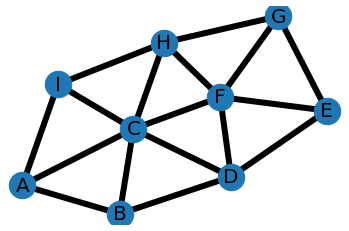

In [ ]:

pos = nx.spring_layout(G)  # positions for all nodes
e = [(u, v) for (u, v, d) in G.edges(data=True)] #extracting all edges

#draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

#draw edges
nx.draw_networkx_edges(G, pos, edgelist=e, width=6)

#labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

Similarly, we have shown how to find egdes associate with a node, neighbours of a node, edges and their weights and heuristic at a node (that we had initialized before) in below code:

In [ ]:
#Find egdes associate with a node
print(G.edges('A'))

#Find neighbours of a node
print(list(G.neighbors('A')))

#Find edges and their weights
for (u, v, wt) in G.edges.data('weight'):
    print(u, v, wt)

#find heuristic at a node
print(G.nodes['A']['h'])

[('A', 'B'), ('A', 'C'), ('A', 'I')]
['B', 'C', 'I']
A B 3
A C 1
A I 3
B C 6
B D 3
C D 2
C F 4
C H 5
C I 4
I H 3
D F 6
D E 3
F E 1
F G 2
F H 5
H G 3
E G 3
5


We have used `heapq` to store nodes in according to their increasing cost functions. The function `is_empty()` is used to return whether a list is empty or not. The function `draw_graph()` has been constructed to accept graph, frontier and explored nodes as graph, heapq (consisting tuples of cost functions and nodes) and set respectively so that it can be easily used to draw the graph at various stages of searching the search space. The explored nodes will be drawn in red color, ones in frontier as green and others as gray.

In [ ]:
import heapq

#test if a list is empty
def is_empty(l):
    return len(l) == 0

#draw graph with various colors for explored nodes, ones in frontier and others.
def draw_graph(graph,frontier,explored):
    fringe=[x[1] for x in frontier]
    nx.draw_networkx_nodes(graph, pos, node_size=500,node_color='gray',alpha=1)
    nx.draw_networkx_nodes(graph, pos,
                        nodelist=fringe,
                        node_color='seagreen',
                        node_size=500,
                        alpha=1)
    nx.draw_networkx_nodes(graph, pos,
                        nodelist=list(explored),
                        node_color='red',
                        node_size=500,
                        alpha=1)
    nx.draw_networkx_edges(graph, pos, edgelist=e, width=3)
    nx.draw_networkx_labels(graph, pos, font_size=20, font_family='sans-serif')
    plt.show()

**Greedy Best-First Search Implementation**

The function `greedyBestFirstSearch()` is used to search the goal node in the graph for a given start node as below. Graph has been drawn in each step to show the state of the graph at each step.

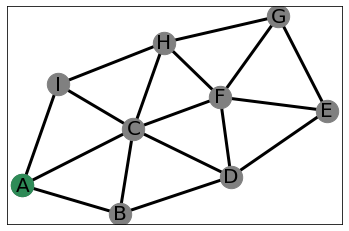

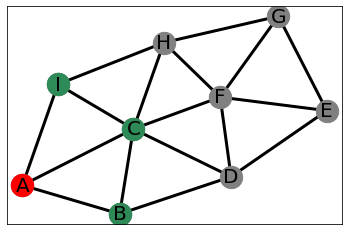

frontier:  [(3, 'B'), (4, 'C'), (4, 'I')] 
explored:  {'A'}


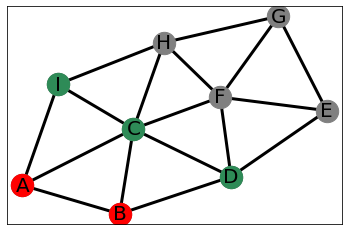

frontier:  [(2, 'D'), (4, 'I'), (4, 'C')] 
explored:  {'A', 'B'}


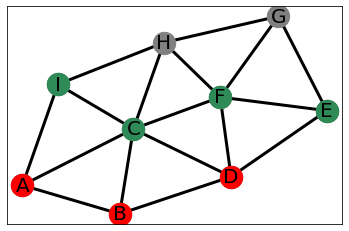

frontier:  [(1, 'E'), (3, 'F'), (4, 'C'), (4, 'I')] 
explored:  {'A', 'D', 'B'}


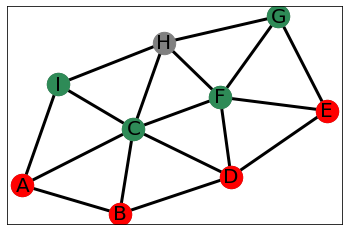

frontier:  [(0, 'G'), (3, 'F'), (4, 'C'), (4, 'I')] 
explored:  {'E', 'A', 'D', 'B'}


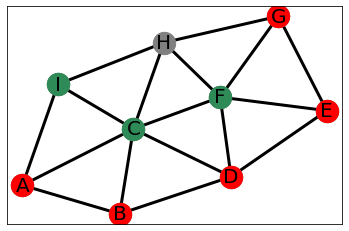

('G', 20000, 'SUCCESS')

In [ ]:
#implementation of greedy best-first search.
def greedyBestFirstSearch(initialNode, goalNode): # Cost f(n) = h(n)

    #initialize frontier with initial node
    frontier=[(0,initialNode)]
    heapq.heapify(frontier)

    #initialized explored set as empty
    explored = set()

    draw_graph(G,frontier,explored)

    while not is_empty(frontier):

        #extract least costly node from frontier
        node = heapq.heappop(frontier)

        #add explored node to explored
        explored.add(node[1])

        #test if the node is a goal node
        if node[1]==goalNode:
            draw_graph(G,frontier,explored)
            return (node[1], G.nodes[node[1]]['g'], "SUCCESS")

        #expand the nodes to get its neighbours if it is not a goal node
        for neighbour in list(G.neighbors(node[1])):

            # if neighbour is not in frontier U explored
            if neighbour not in [x[1] for x in frontier]and (neighbour not in explored):
                #add neighbour to frontier
                heapq.heappush(frontier,(G.nodes[neighbour]['h'],neighbour))

            elif neighbour in frontier:
                #update frontier
                heapq.heappush(frontier,(G.nodes[neighbour]['h'],neighbour))
        draw_graph(G,frontier,explored)
        print('frontier: ', frontier,'\nexplored: ', explored)
    return "FAILURE"

#solution to our problem using greedy best-first search
greedyBestFirstSearch('A', 'G')

**A* Search Implementation**

The function `aStarSearch()` is used to search the goal node in the graph for a given start node as below. Graph has been drawn in each step to show the state of the graph at each step.

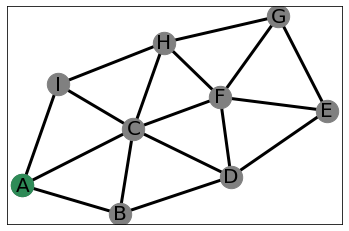

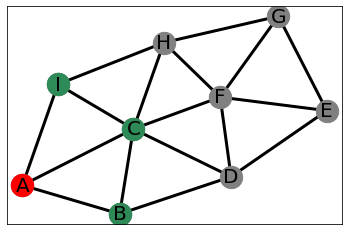

frontier:  [(5, 'C'), (6, 'B'), (7, 'I')] 
explored:  {'A'}


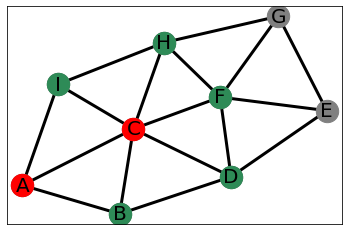

frontier:  [(5, 'D'), (7, 'I'), (6, 'B'), (8, 'F'), (9, 'H')] 
explored:  {'A', 'C'}


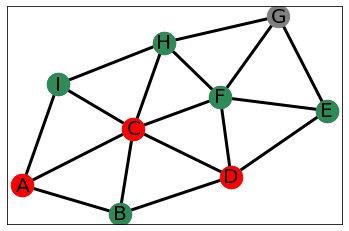

frontier:  [(6, 'B'), (7, 'E'), (9, 'H'), (8, 'F'), (7, 'I')] 
explored:  {'A', 'D', 'C'}


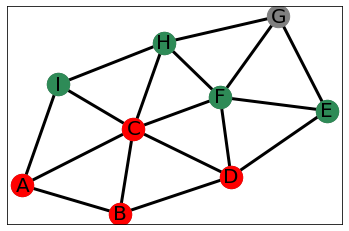

frontier:  [(7, 'E'), (7, 'I'), (9, 'H'), (8, 'F')] 
explored:  {'A', 'D', 'B', 'C'}


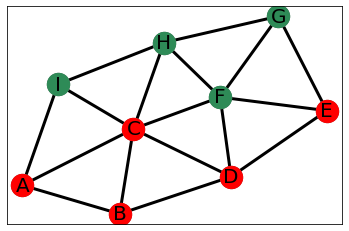

frontier:  [(7, 'G'), (7, 'I'), (9, 'H'), (8, 'F')] 
explored:  {'A', 'E', 'D', 'B', 'C'}


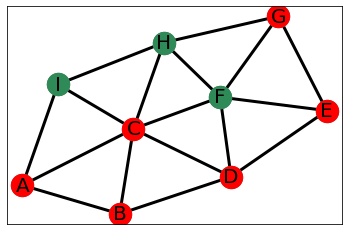

('G', 7, 'SUCCESS')

In [ ]:
#implementation of greedy A* search.
def aStarSearch(initialNode, goalNode): # Cost f(n) = g(n) + h(n)

    #set cost value to start node as 0
    G.nodes[initialNode]['g'] = 0

    #initialize frontier with initial node
    frontier=[(G.nodes[initialNode]['h'],initialNode)]
    heapq.heapify(frontier)

    #initialized explored set as empty
    explored = set()

    draw_graph(G,frontier,explored)

    while not is_empty(frontier):

        #extract least costly node from frontier
        node = heapq.heappop(frontier)

        #add explored node to explored
        explored.add(node[1])

        #test if the node is a goal node
        if node[1]==goalNode:
            draw_graph(G,frontier,explored)
            return (node[1],G.nodes[node[1]]['g'],"SUCCESS")

        #expand the nodes to get its neighbours if it is not a goal node
        for neighbour in list(G.neighbors(node[1])):
            #extract length of road from parent node to child node
            weight=[d for (u, v, d) in G.edges(data=True) if (u==node[1] and v== neighbour)or (v==node[1] and u== neighbour)][0]['weight']

            #update the actual cost to reach node n i.e. g(n) if path with lower cost has been found
            if (G.nodes[node[1]]['g']+weight)<G.nodes[neighbour]['g']:
                G.nodes[neighbour]['g'] = G.nodes[node[1]]['g']+weight

            # if neighbour is not in frontier U explored
            if neighbour not in [x[1] for x in frontier]and (neighbour not in explored):
                #add neighbour to frontier
                heapq.heappush(frontier,(G.nodes[neighbour]['h']+G.nodes[neighbour]['g'],neighbour))

            elif neighbour in frontier:
                #update frontier
                heapq.heappush(frontier,(G.nodes[neighbour]['h']+G.nodes[neighbour]['g'],neighbour))
        draw_graph(G,frontier,explored)
        print('frontier: ', frontier,'\nexplored: ', explored)
    return "FAILURE"

#solution to our problem using A* search
aStarSearch('A', 'G')

### References
Russell, Stuart J., and Peter Norvig. Artificial intelligence: a modern approach. Malaysia; Pearson Education Limited, 2016.